In [1]:
# Basis Library
import os , sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\priya\\PreProcessing'

In [19]:
dataset = pd.read_excel('Employee_Data.xls')

In [20]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [21]:
mydata = dataset.copy()

In [22]:
mydata.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [23]:
# Q : How many data points and features we have ?
print(dataset.shape)

(100, 7)


In [24]:
# Q : What are the columns name given in our dataset ?
print(dataset.columns)

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')


In [25]:
# Q : What are the datatype we have ?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [26]:
# Pre-processing 
# Part 1 : Handling missing value
dataset.isnull().sum()/len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [27]:
# imputation is required in the missing variable
# Department - Object - MODE / most frequent occurence
# Age and Experience - Number
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [28]:
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

In [29]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

In [30]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

<AxesSubplot:ylabel='Age'>

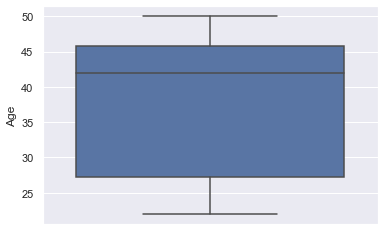

In [31]:
# Age and Experience - Numerical variable
# mean or median - check outlier
# if outlier found - median and if no outlier - mean
sns.boxplot(y='Age', data=dataset)

# Age - Mean


<AxesSubplot:ylabel='Experience'>

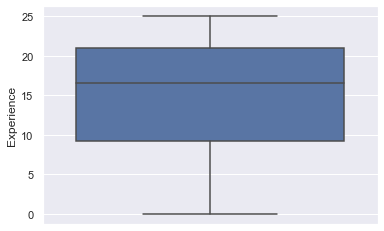

In [32]:
sns.boxplot(y='Experience', data=dataset)

In [33]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [35]:
print("Median :",dataset['Age'].median())
print("Mean :", dataset['Age'].mean())

Median : 39.5
Mean : 37.97560975609756


In [36]:
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())

In [37]:
dataset.describe()

,Employee Id,Age,Experience,Salary
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000
std,29.011492,8.606992,6.532050,26189.874212
min,1.000000,22.000000,0.000000,11830.000000
25%,25.750000,30.000000,10.000000,48526.000000
50%,50.500000,39.500000,15.000000,73500.500000
75%,75.250000,44.250000,20.000000,86621.250000
max,100.000000,50.000000,25.000000,98180.000000


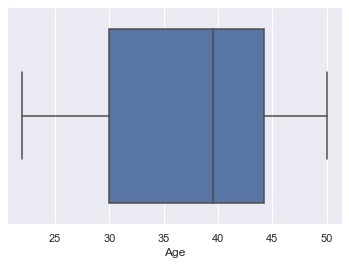

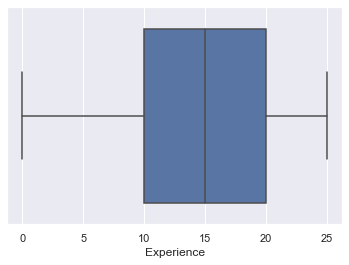

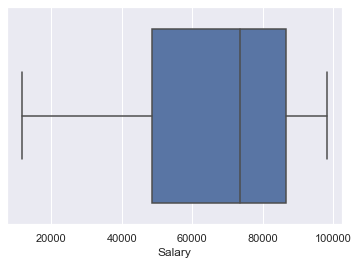

In [38]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [39]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [40]:
mydata.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [44]:
x = mydata.iloc[:,4:].values

x

In [45]:
# using sklearn to handle missing value
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = simple_imputer.fit_transform(x)

In [46]:
x = pd.DataFrame(x)
x.head()

,0,1,2
0,28.0,3.0,32889.0
1,22.0,1.0,15944.0
2,22.0,1.0,40343.0
3,22.0,1.0,19018.0
4,27.0,0.0,24795.0


In [47]:
#column_label = ['Department','Age','Experience','Salary']
df = dataset.copy()
df = df.iloc[:,4:]
df.head(1)

,Age,Experience,Salary
0,28.0,3.0,32889


In [50]:
column_label = ['Age','Experience','Salary']
x.columns = column_label

In [51]:
x.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

# Encoding part 

In [52]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [53]:
dataset_1 = dataset.iloc[:,3:]

In [54]:
dataset_1.head()

,Department,Age,Experience,Salary
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795


In [55]:
dataset_1.isnull().sum()

Department    0
Age           0
Experience    0
Salary        0
dtype: int64

In [56]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Department  100 non-null    object 
 1   Age         100 non-null    float64
 2   Experience  100 non-null    float64
 3   Salary      100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [57]:
dataset_1['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [58]:
# Label encoder
dataset_1['Department'] = dataset_1['Department'].astype('category')
dataset_1['Department'] = dataset_1['Department'].cat.codes

In [59]:
dataset_1.head()

,Department,Age,Experience,Salary
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795


In [60]:
dataset_1.tail()

,Department,Age,Experience,Salary
95,2,47.0,22.0,79077
96,2,46.0,20.0,81187
97,1,44.0,18.0,83847
98,1,47.0,22.0,89158
99,0,44.0,21.0,91645


In [61]:
# One Hot Encoder
dataset_1 = pd.get_dummies(dataset_1, columns=['Department'])

dataset_1

In [62]:
# Dummy variable
dataset_1 = dataset_1.drop(['Department_2'], axis=1)

In [63]:
dataset_1.head()

,Age,Experience,Salary,Department_0,Department_1
0,28.0,3.0,32889,0,0
1,22.0,1.0,15944,0,0
2,22.0,1.0,40343,0,1
3,22.0,1.0,19018,0,1
4,27.0,0.0,24795,1,0


# Feature Scaling 
# 1) Standarisation
# 2) Normalization

In [64]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_fs_stand = sc_x.fit_transform(dataset_1)

In [65]:
x_fs_stand

array([[-1.16485118e+00, -1.81044925e+00, -1.23482325e+00,
        -6.08163641e-01, -5.61951487e-01],
       [-1.86547071e+00, -2.11817433e+00, -1.88508853e+00,
        -6.08163641e-01, -5.61951487e-01],
       [-1.86547071e+00, -2.11817433e+00, -9.48775604e-01,
        -6.08163641e-01,  1.77951304e+00],
       [-1.86547071e+00, -2.11817433e+00, -1.76712361e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.28162110e+00, -2.27203688e+00, -1.54543093e+00,
         1.64429429e+00, -5.61951487e-01],
       [-1.39839102e+00, -1.50272416e+00, -1.90646343e+00,
         1.64429429e+00, -5.61951487e-01],
       [-1.63193087e+00, -1.34886162e+00, -1.18769869e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.04808125e+00, -1.96431179e+00, -1.87914039e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.04808125e+00, -1.50272416e+00, -8.81158761e-01,
        -6.08163641e-01, -5.61951487e-01],
       [-9.31311332e-01, -1.34886162e+00, -2.04062262e+00,
        -6.08163641e-01

In [66]:
# Normalisation

from sklearn.preprocessing import Normalizer
x_nor = Normalizer()
x_fs_nor = x_nor.fit_transform(dataset_1)

In [67]:
x_fs_nor

array([[8.51348163e-04, 9.12158746e-05, 9.99999633e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.37982809e-03, 6.27194585e-05, 9.99999046e-01, 0.00000000e+00,
        0.00000000e+00],
       [5.45323767e-04, 2.47874439e-05, 9.99999851e-01, 0.00000000e+00,
        2.47874439e-05],
       [1.15679804e-03, 5.25817293e-05, 9.99999328e-01, 0.00000000e+00,
        5.25817293e-05],
       [1.08892857e-03, 0.00000000e+00, 9.99999406e-01, 4.03306879e-05,
        0.00000000e+00],
       [1.68973559e-03, 3.24949151e-04, 9.99998517e-01, 6.49898302e-05,
        0.00000000e+00],
       [7.03461432e-04, 1.75865358e-04, 9.99999737e-01, 0.00000000e+00,
        2.93108930e-05],
       [1.80135118e-03, 1.24231116e-04, 9.99998368e-01, 0.00000000e+00,
        6.21155580e-05],
       [6.88754136e-04, 1.18750713e-04, 9.99999756e-01, 0.00000000e+00,
        0.00000000e+00],
       [2.52290813e-03, 5.04581626e-04, 9.99996687e-01, 0.00000000e+00,
        8.40969377e-05],
       [7.49560135e-04, 1.4414